## K-Means

- Usaremos um dataset famoso chamado Iris, onde precisamos clusterizar flores em 3 classes
- O dataset possui 4 variáveis preditoras (largura e altura do caule e largura e altura da pétala)

Links:
- https://archive.ics.uci.edu/ml/datasets/iris
- https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
# Importar bibliotecas necessárias
from sklearn import datasets # Importa datasets exemplo do SKLearn
from sklearn.preprocessing import StandardScaler  # Importa método de Normalização
from sklearn.model_selection import train_test_split # importa um metodo para dividir o dataset
from sklearn.cluster import KMeans  # Importa método para K-Means 
from sklearn.metrics import classification_report, confusion_matrix  # Importa métodos para avaliar métricas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar Dataset de Exemplo (IRIS)
iris = datasets.load_iris()
irs = pd.DataFrame(iris.data, columns = iris.feature_names)
irs['class'] = iris.target
irs.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
# Visualizar colunas
irs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
## Visualizar informações estatísticas
irs.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Preparar o conjunto de dados

Por ser um algoritmo não-supervisionado, iremos enviar para o K-Means apenas as variáveis preditoras (X), sem a variável y.
De qualquer forma, estamos isolado o Y para verificar se o algoritmo performou bem na descoberta dos 3 clusters, comparando com a classe (tipo de flor) real

In [5]:
# Selecionar Variáveis Preditoras (X) por iloc, trazendo só as colunas de sepal (:2)
X = irs.iloc[:, :2].values

# Selecionar Variável Resposta por iloc, trazendo só a última coluna (4)
y = irs.iloc[:, 4].values

### Mostrar a distribuição dos dados em um Scatterplot

Text(0, 0.5, 'Sepal Width')

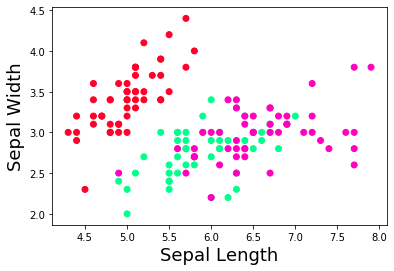

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Normalização de Dados

A maioria dos algoritmos de Machine Learning assumem que os dados estão padronizados na hora de construir o modelo, isto é, assumem que os dados estão todos na mesma escala.

Sem isso alguns algoritmos terão uma performance ruim gerando modelos ineficientes.

Um exemplo disso são os algoritmos baseados em cálculos de distância.

O pacote preprocessing da Scikit-Learn tem algumas funções de padronização como a StandardScaler().

O StandardScaler() ignora a forma da distribuição e transforma os dados para forma com média próxima de zero e um desvio padrão próximo a um.

A distribuição normal com média zero (nula) e desvio padrão unitário é chamada de distribuição normal centrada e reduzida ou de distribuição normal padrão.

Lembrando que o desvio padrão é a medida de dispersão em torno da média, ele diz qual é a variação dos dados em torno da média.

A distribuição normal é uma das mais importantes distribuições da estatística, ela é conhecida também como distribuição de Gauss ou Gaussiana.

In [7]:
scaler = StandardScaler()
scaler.fit(X)

X_treinamento = scaler.transform(X)  

### Criar um estimador do tipo K-Means

- Vamos criar um objeto de K-Means, o qual usaremos para treinar um modelo com todos os dados

In [12]:
modelo = KMeans(n_clusters = 3, random_state = 42, max_iter = 300)  
modelo.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Realizar predições

- Fazer predições com o modelo treinado, usando o conjunto de testes

In [13]:
y_pred = modelo.predict(X)

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

### Avaliar algoritmo 

Neste caso, mesmo sendo um algoritmo não-supervisionado onde não há uma resposta pré-definida para treinamento do modelo, iremos comparar a predição que o K-Means gerou com a classe real que "ocultamos" na variável y.

Esta comparação irá calcular a acurácia, ou seja, calcular o percentual de acertos entre a predição e o real.

In [17]:
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))

[[50  0  0]
 [ 0 12 38]
 [ 0 35 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.26      0.24      0.25        50
           2       0.28      0.30      0.29        50

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.51      0.51      0.51       150



### Apresentar um gráfico de Scatter comparando a classe real com a classe que foi prevista pelo modelo

Text(0.5, 1.0, 'Previsão')

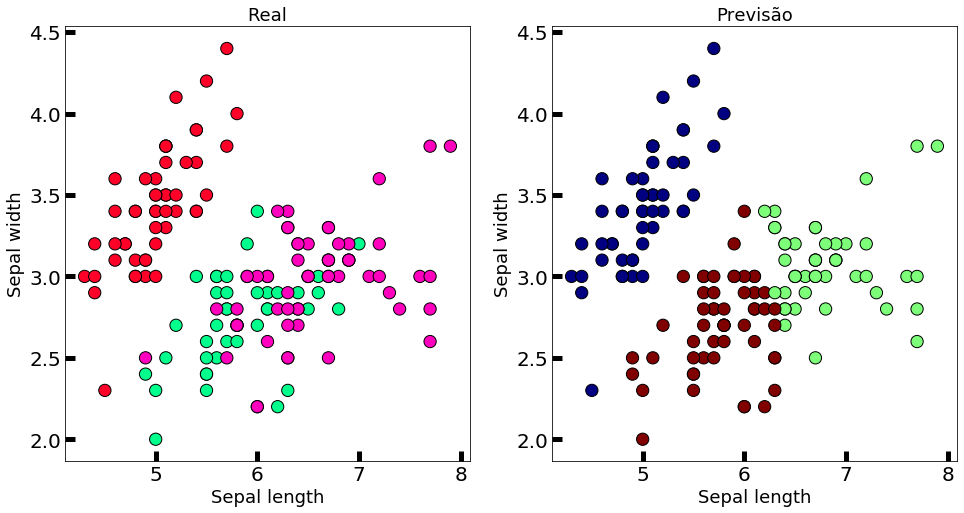

In [16]:
# Plot the identified clusters and compare with the answers
new_labels = modelo.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Real', fontsize=18)
axes[1].set_title('Previsão', fontsize=18)